<a href="https://colab.research.google.com/github/yaraaldos/Diabetes-risk-prediction/blob/main/Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url) # to upload and read data
df1=pd.DataFrame(df)

print("Loaded shape:", df1.shape) # to show the number of columns and rows
print("\nHead:")
print(df1.head()) # shows a sample of 5 rows of all coulmns (This step i put to ensure the data loaded correctly)

Loaded shape: (1000, 14)

Head:
    ID  No_Pation Gender  AGE  Urea  Cr  HbA1c  Chol   TG  HDL  LDL  VLDL  \
0  502      17975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
1  735      34221      M   26   4.5  62    4.9   3.7  1.4  1.1  2.1   0.6   
2  420      47975      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
3  680      87656      F   50   4.7  46    4.9   4.2  0.9  2.4  1.4   0.5   
4  504      34223      M   33   7.1  46    4.9   4.9  1.0  0.8  2.0   0.4   

    BMI CLASS  
0  24.0     N  
1  23.0     N  
2  24.0     N  
3  24.0     N  
4  21.0     N  


In [ ]:
df1.describe() # for showing the five number summery (statistical summury)

,ID,No_Pation,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
count,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,340.500000,2.705514e+05,53.528000,5.124743,68.943000,8.281160,4.862820,2.349610,1.204750,2.609790,1.854700,29.578020
std,240.397673,3.380758e+06,8.799241,2.935165,59.984747,2.534003,1.301738,1.401176,0.660414,1.115102,3.663599,4.962388
min,1.000000,1.230000e+02,20.000000,0.500000,6.000000,0.900000,0.000000,0.300000,0.200000,0.300000,0.100000,19.000000
25%,125.750000,2.406375e+04,51.000000,3.700000,48.000000,6.500000,4.000000,1.500000,0.900000,1.800000,0.700000,26.000000
50%,300.500000,3.439550e+04,55.000000,4.600000,60.000000,8.000000,4.800000,2.000000,1.100000,2.500000,0.900000,30.000000
75%,550.250000,4.538425e+04,59.000000,5.700000,73.000000,10.200000,5.600000,2.900000,1.300000,3.300000,1.500000,33.000000
max,800.000000,7.543566e+07,79.000000,38.900000,800.000000,16.000000,10.300000,13.800000,9.900000,9.900000,35.000000,47.750000


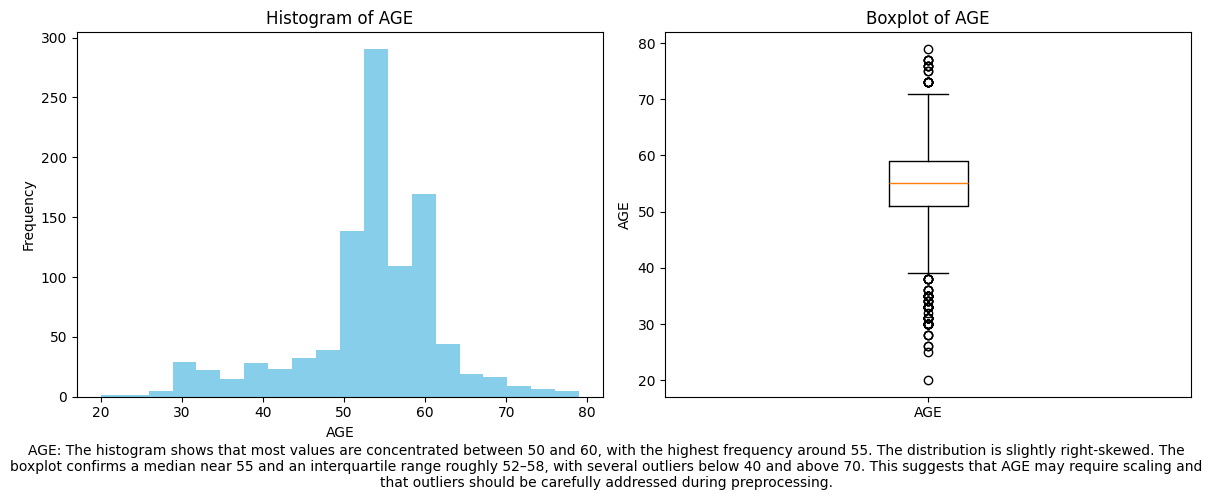

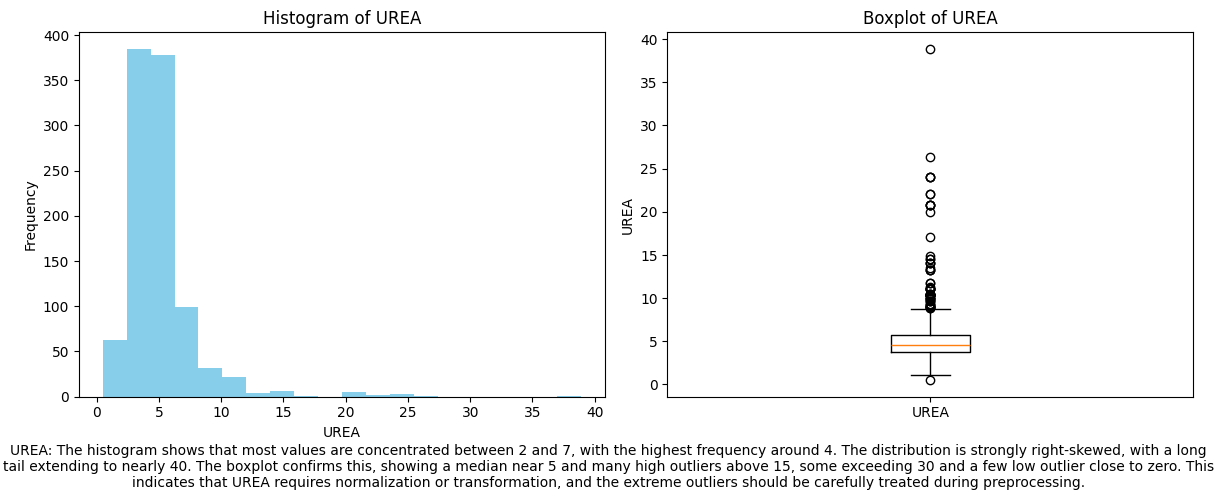

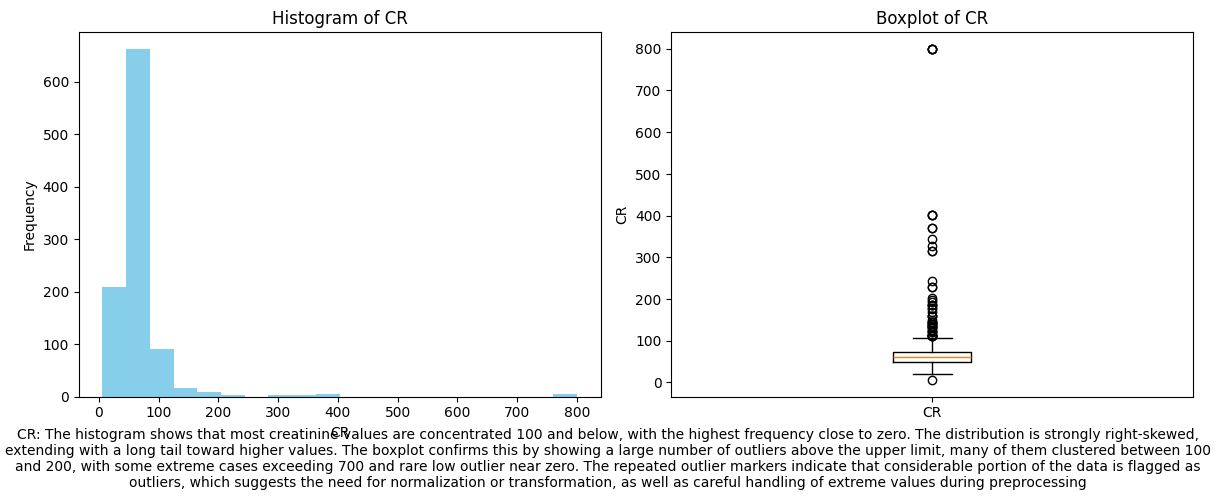

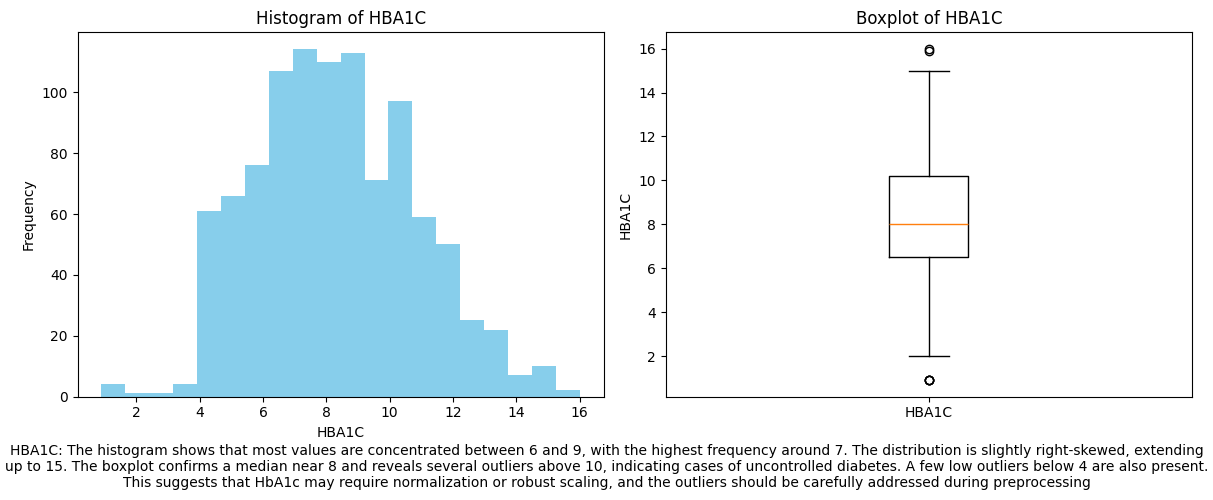

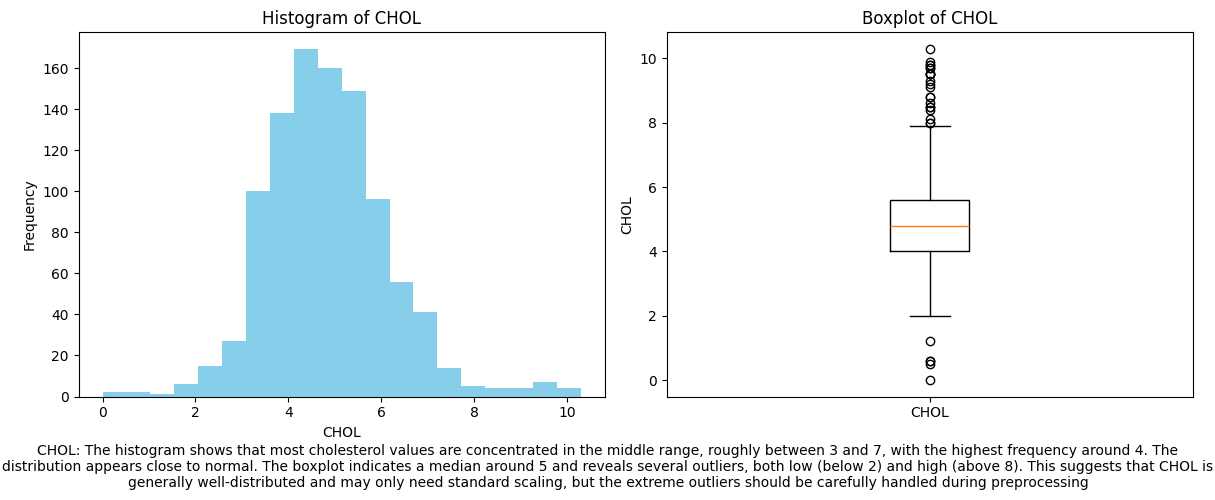

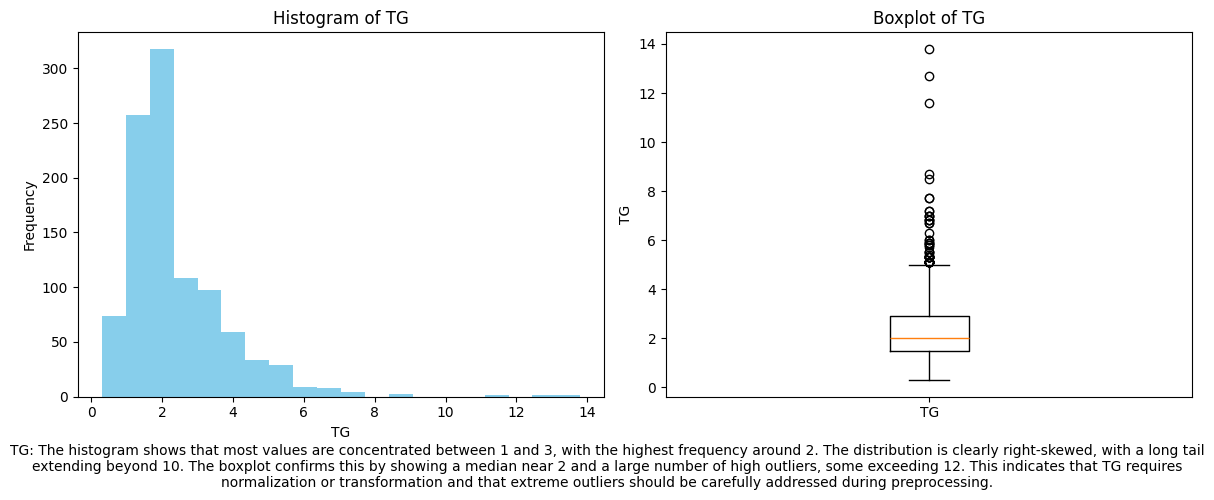

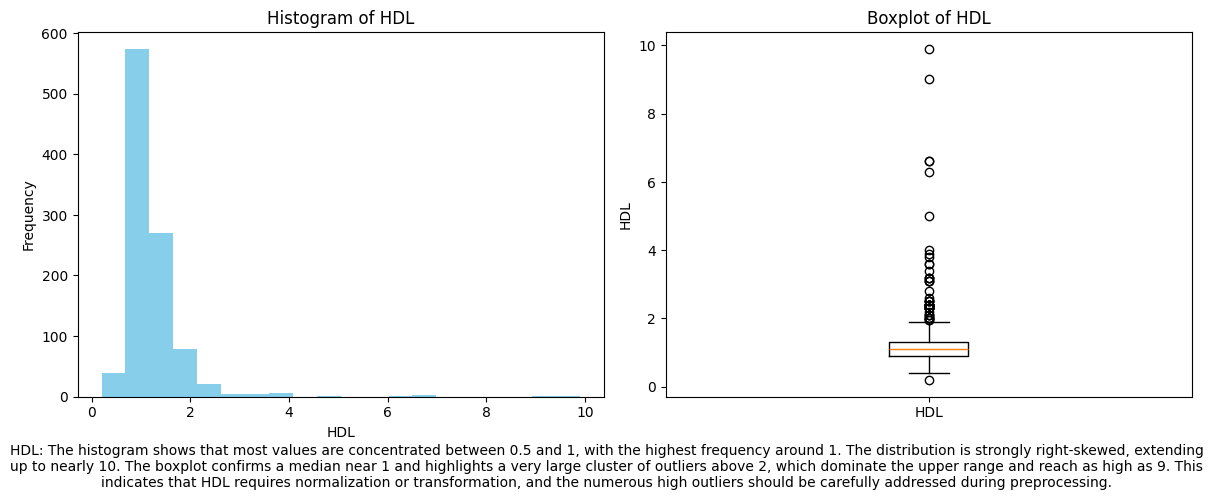

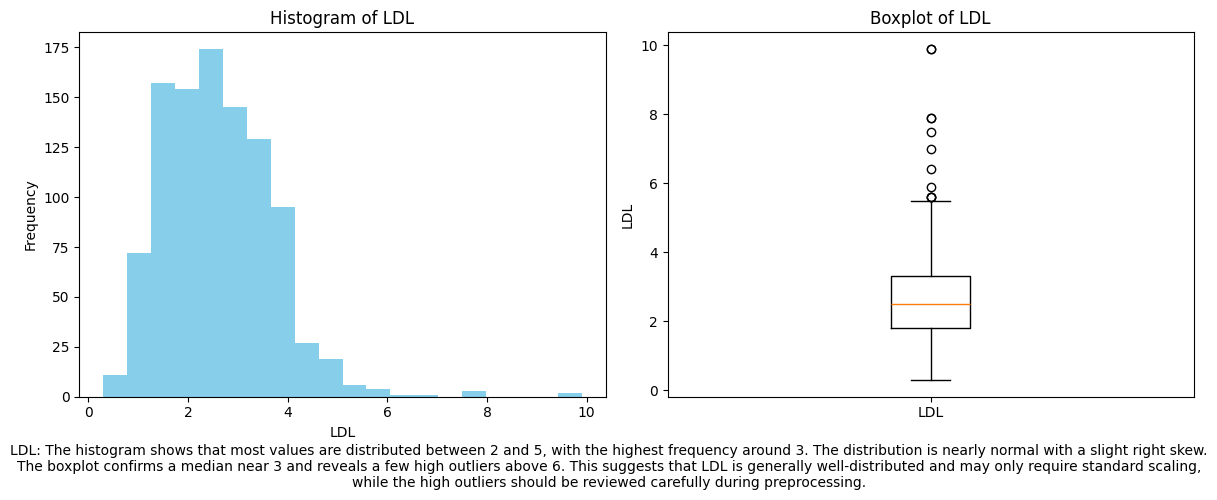

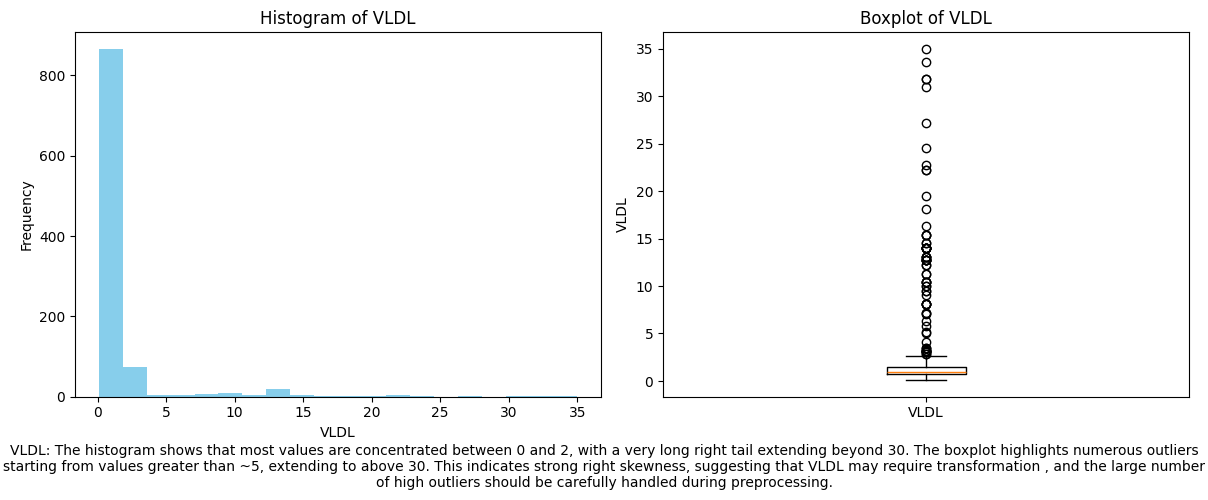

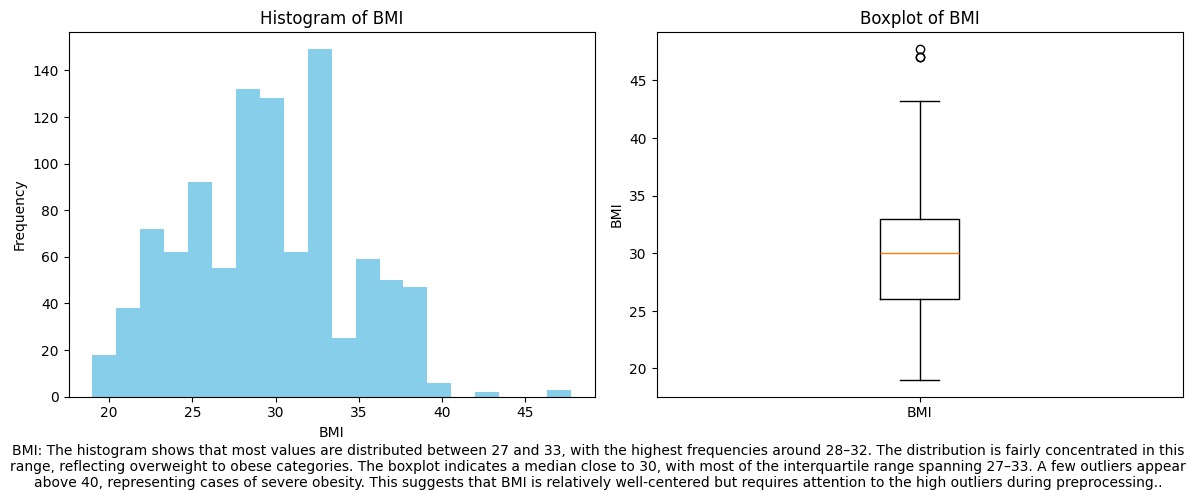

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url)

df.columns = df.columns.str.strip().str.upper()

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
numeric_cols = [col for col in numeric_cols if col not in ["ID", "NO_PATION"]]

descriptions = {
    "AGE":   "The histogram shows that most values are concentrated between 50 and 60, with the highest frequency around 55. The distribution is slightly right-skewed. The boxplot confirms a median near 55 and an interquartile range roughly 52–58, with several outliers below 40 and above 70. This suggests that AGE may require scaling and that outliers should be carefully addressed during preprocessing.",
    "UREA":  "The histogram shows that most values are concentrated between 2 and 7, with the highest frequency around 4. The distribution is strongly right-skewed, with a long tail extending to nearly 40. The boxplot confirms this, showing a median near 5 and many high outliers above 15, some exceeding 30 and a few low outlier close to zero. This indicates that UREA requires normalization or transformation, and the extreme outliers should be carefully treated during preprocessing.",
    "CR":    "The histogram shows that most creatinine values are concentrated 100 and below, with the highest frequency close to zero. The distribution is strongly right-skewed, extending with a long tail toward higher values. The boxplot confirms this by showing a large number of outliers above the upper limit, many of them clustered between 100 and 200, with some extreme cases exceeding 700 and rare low outlier near zero. The repeated outlier markers indicate that considerable portion of the data is flagged as outliers, which suggests the need for normalization or transformation, as well as careful handling of extreme values during preprocessing",
    "HBA1C": "The histogram shows that most values are concentrated between 6 and 9, with the highest frequency around 7. The distribution is slightly right-skewed, extending up to 15. The boxplot confirms a median near 8 and reveals several outliers above 10, indicating cases of uncontrolled diabetes. A few low outliers below 4 are also present. This suggests that HbA1c may require normalization or robust scaling, and the outliers should be carefully addressed during preprocessing",
    "CHOL":  "The histogram shows that most cholesterol values are concentrated in the middle range, roughly between 3 and 7, with the highest frequency around 4. The distribution appears close to normal. The boxplot indicates a median around 5 and reveals several outliers, both low (below 2) and high (above 8). This suggests that CHOL is generally well-distributed and may only need standard scaling, but the extreme outliers should be carefully handled during preprocessing",
    "TG":    "The histogram shows that most values are concentrated between 1 and 3, with the highest frequency around 2. The distribution is clearly right-skewed, with a long tail extending beyond 10. The boxplot confirms this by showing a median near 2 and a large number of high outliers, some exceeding 12. This indicates that TG requires normalization or transformation and that extreme outliers should be carefully addressed during preprocessing.",
    "HDL":   "The histogram shows that most values are concentrated between 0.5 and 1, with the highest frequency around 1. The distribution is strongly right-skewed, extending up to nearly 10. The boxplot confirms a median near 1 and highlights a very large cluster of outliers above 2, which dominate the upper range and reach as high as 9. This indicates that HDL requires normalization or transformation, and the numerous high outliers should be carefully addressed during preprocessing.",
    "LDL":   "The histogram shows that most values are distributed between 2 and 5, with the highest frequency around 3. The distribution is nearly normal with a slight right skew. The boxplot confirms a median near 3 and reveals a few high outliers above 6. This suggests that LDL is generally well-distributed and may only require standard scaling, while the high outliers should be reviewed carefully during preprocessing.",
    "VLDL":  "The histogram shows that most values are concentrated between 0 and 2, with a very long right tail extending beyond 30. The boxplot highlights numerous outliers starting from values greater than ~5, extending to above 30. This indicates strong right skewness, suggesting that VLDL may require transformation , and the large number of high outliers should be carefully handled during preprocessing.",
    "BMI":   "The histogram shows that most values are distributed between 27 and 33, with the highest frequencies around 28–32. The distribution is fairly concentrated in this range, reflecting overweight to obese categories. The boxplot indicates a median close to 30, with most of the interquartile range spanning 27–33. A few outliers appear above 40, representing cases of severe obesity. This suggests that BMI is relatively well-centered but requires attention to the high outliers during preprocessing.."
}

for col in numeric_cols:
    vals = df[col].dropna()

    plt.figure(figsize=(12,5))

    # Histogram
    plt.subplot(1, 2, 1)
    plt.hist(vals, bins=20, color="skyblue")
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

    # Boxplot
    plt.subplot(1, 2, 2)
    plt.boxplot(vals, vert=True, tick_labels=[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)

    # captions
    desc = descriptions.get(col)
    plt.tight_layout(rect=[0, 0.08, 1, 1])  # space for the caption
    plt.figtext(0.5, 0.02, f"{col}: {desc}", wrap=True, ha='center', fontsize=10)

    plt.show()

 **Show Missing Data:**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/yaraaldos/Diabetes-risk-prediction/refs/heads/main/Dataset/Raw_data.csv"
df = pd.read_csv(url)

# Display missing values count and percentage for each column

missing_counts = df.isnull().sum()
print("Missing values in each column:")
print(missing_counts)
print()
rows_with_missing = df.isnull().sum(axis=1)
print("Rows with missing values:")
print(rows_with_missing);

Missing values in each column:
ID           0
No_Pation    0
Gender       0
AGE          0
Urea         0
Cr           0
HbA1c        0
Chol         0
TG           0
HDL          0
LDL          0
VLDL         0
BMI          0
CLASS        0
dtype: int64

Rows with missing values:
0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64


that all attributes (ID, No_Pation, Gender, AGE, Urea, Cr, HbA1c, Chol, TG, HDL, LDL, VLDL, BMI, and CLASS) have 0 missing values . This indicates that the dataset is complete with no missing data, and therefore no imputation or preprocessing is required for missing values.Note: The ID column is an identifier only and is not used for prediction. It has no missing values, which confirms that all records are properly indexed.